# **Economic Dynamics & Social Protection in Ireland**

## Goal
The goal of this project is to understand how labour force participation and social protection policies interact to shape economic health. Using Python for data analysis, the project explore how employment, unemployment, and welfare programs have evolved from 1998 to 2023, and what these patterns reveal about the effectiveness of Ireland’s policies and the resilience of its economy.

## Setup

#### Importing libraries

In [1243]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import plotly.io as pio
from IPython.display import Image

%matplotlib inline

## Data Preparation

#### Social Protection Dataset

In [1244]:
# Load data
datasp = pd.read_csv('SocialProt_original.csv')
datasp.head()

,period,programme,scheme,scheme_description,basis,county,county_code,UGI,recipients
0,2014Q1,Children,CB,Child Benefit,Social Assistance,All,All,XX,"623,739"
1,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,All,All,XX,"48,327"
2,2014Q1,Children,CB,Child Benefit,Social Assistance,Carlow,CW,2ae19629-143d-13a3-e055-000000000001,"8,319"
3,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,Carlow,CW,2ae19629-143d-13a3-e055-000000000001,774
4,2014Q1,Children,CB,Child Benefit,Social Assistance,Cavan,CN,2ae19629-1448-13a3-e055-000000000001,"10,349"


In [1245]:
# Filter columns
columns_selection = ['period', 'scheme_description', 'county', 'recipients']
datasp = datasp[columns_selection]
datasp.head()

,period,scheme_description,county,recipients
0,2014Q1,Child Benefit,All,"623,739"
1,2014Q1,Family Income Supplement,All,"48,327"
2,2014Q1,Child Benefit,Carlow,"8,319"
3,2014Q1,Family Income Supplement,Carlow,774
4,2014Q1,Child Benefit,Cavan,"10,349"


In [1246]:
# Check duplicates
datasp.duplicated().sum() 

0

In [1247]:
# Check null values
datasp.isnull().sum()

period                0
scheme_description    0
county                0
recipients            0
dtype: int64

In [1248]:
# Rename columns
datasp.rename(columns= {'period': 'Year',
                        'county': 'Residence_county',
                        'scheme_description': 'Scheme_description',
                        'recipients': 'Recipients'}, inplace=True)

In [1249]:
# Count residence_county values
datasp['Residence_county'].value_counts()

Residence_county
All          874
Limerick     853
Wexford      853
Westmeath    853
Waterford    853
Tipperary    853
Offaly       853
Monaghan     853
Meath        853
Mayo         853
Louth        853
Carlow       853
Longford     853
Leitrim      853
Laois        853
Kilkenny     853
Kildare      853
Kerry        853
Galway       853
Dublin       853
Donegal      853
Cork         853
Clare        853
Wicklow      853
Roscommon    852
Sligo        852
Cavan        852
Unknown      845
Name: count, dtype: int64

In [1250]:
# Remove Unknown data and all values from residence_county column
datasp = datasp[datasp['Residence_county'] != 'Unknown']
datasp = datasp[datasp['Residence_county'] != 'All']

In [1251]:
# Change recipients type to integer
datasp['Recipients'] = datasp['Recipients'].astype(int)
datasp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22175 entries, 2 to 23893
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                22175 non-null  object
 1   Scheme_description  22175 non-null  object
 2   Residence_county    22175 non-null  object
 3   Recipients          22175 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 779.6+ KB


In [1252]:
# Split year in two columns (year and period)
datasp[['Year', 'Period']] = datasp['Year'].str.split('Q', expand=True) 

In [1253]:
# Convert year and periods to integer
datasp['Period'] = datasp['Period'].astype(int)
datasp['Year'] = datasp['Year'].astype(int)

In [1254]:
# Organize columns and reset index
columns_selection = ['Year', 'Period', 'Scheme_description', 'Residence_county', 'Recipients']
datasp = datasp[columns_selection]
datasp.reset_index(drop=True, inplace=True)
datasp.head()

,Year,Period,Scheme_description,Residence_county,Recipients
0,2014,1,Child Benefit,Carlow,8319
1,2014,1,Family Income Supplement,Carlow,774
2,2014,1,Child Benefit,Cavan,10349
3,2014,1,Family Income Supplement,Cavan,1089
4,2014,1,Child Benefit,Clare,15958


#### Labour Force Dataset

In [1255]:
# Load dataset
labour_df = pd.read_csv("Labour_force .csv")
labour_df.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02199V02655,Sex,C01999V02434,ILO Economic Status,UNIT,VALUE
0,QLF01C01,Persons aged 15 years and over,19981,1998Q1,-,Both sexes,-,All ILO economic status,Thousand,"2,857"
1,QLF01C01,Persons aged 15 years and over,19981,1998Q1,-,Both sexes,01,In labour force,Thousand,"1,699"
2,QLF01C01,Persons aged 15 years and over,19981,1998Q1,-,Both sexes,02,In employment,Thousand,"1,550"
3,QLF01C01,Persons aged 15 years and over,19981,1998Q1,-,Both sexes,03,In employment full-time,Thousand,"1,283"
4,QLF01C01,Persons aged 15 years and over,19981,1998Q1,-,Both sexes,04,In employment part-time,Thousand,268


In [1256]:
# Filter Sex column to both sexes
labour_df = labour_df[labour_df["Sex"] == "Both sexes"]

In [1257]:
# Filter Columns
columns_labour = ["Quarter", "ILO Economic Status", "VALUE"]
labour_df = labour_df[columns_labour]

In [1258]:
# Check variables in economic status
labour_df["ILO Economic Status"].unique()

array(['All ILO economic status', 'In labour force', 'In employment',
       'In employment full-time', 'In employment part-time',
       'In employment part-time - not underemployed',
       'In employment part-time - underemployed', 'Unemployed',
       'Unemployed seeking full-time work/future job-starter',
       'Unemployed seeking part-time work', 'Not in labour force',
       'Potential additional labour force', 'Others not in labour force',
       'Unemployed seeking work as self-employed'], dtype=object)

In [1259]:
# Filter ILO Economic Status column: In labour force / In employment / Unemployed / Not in labour force
labour_df = labour_df[labour_df["ILO Economic Status"].isin(["In labour force", "In employment", "Unemployed", "Not in labour force"])].reset_index(drop=True)
labour_df.head()

,Quarter,ILO Economic Status,VALUE
0,1998Q1,In labour force,"1,699"
1,1998Q1,In employment,"1,550"
2,1998Q1,Unemployed,149
3,1998Q1,Not in labour force,"1,158"
4,1998Q2,In labour force,"1,711"


In [1260]:
# Check null
labour_df.isnull().sum()

Quarter                0
ILO Economic Status    0
VALUE                  0
dtype: int64

In [1261]:
# Check duplicates
labour_df.duplicated().sum()

0

In [1262]:
# Split year in two columns (year and period)
labour_df[["year", "period"]] = labour_df["Quarter"].str.split("Q", expand=True)

In [1263]:
# Rename columns
labour_df.rename(columns={
                          "ILO Economic Status": "economic_status",
                          "VALUE": "individuals"
                          }, inplace=True)

In [1264]:
# Organize columns
columns_order = ["year", "period", "economic_status", "individuals"]
labour_df = labour_df[columns_order]

# Set the individuals columns to thousands
labour_df["individuals"] = labour_df["individuals"]*1000

In [1265]:
# Check outliers
Q1 = labour_df['individuals'].quantile(.25)
Q3 = labour_df['individuals'].quantile(.75)
IQR = Q3 - Q1
lower_out = Q1 - 1.5 * IQR
upper_out = Q3 + 1.5 * IQR

outliers = labour_df[(labour_df['individuals'] < lower_out) | (labour_df['individuals'] > upper_out)]
outliers.sum()


year               0
period             0
economic_status    0
individuals        0
dtype: object

In [1266]:
# Change data type to integer
labour_df["year"] = labour_df["year"].astype(np.int64)
labour_df["period"] = labour_df["period"].astype(np.int64)

In [1267]:
labour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             428 non-null    int64  
 1   period           428 non-null    int64  
 2   economic_status  428 non-null    object 
 3   individuals      428 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.5+ KB


In [1268]:
labour_df.head()

,year,period,economic_status,individuals
0,1998,1,In labour force,"1,699,000"
1,1998,1,In employment,"1,550,300"
2,1998,1,Unemployed,"148,700"
3,1998,1,Not in labour force,"1,158,200"
4,1998,2,In labour force,"1,710,700"


#### Social Protection Expenditure Dataset

In [1269]:
# Load dataset
expenditure_df = pd.read_csv("Expenditure.csv")
expenditure_df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03908V04660,Social Protection Expenditure,UNIT,VALUE
0,SPEA02C01,Social Protection Expenditure by function,2000,2000,1000000,Total Social Protection Expenditure,€million,16466
1,SPEA02C01,Social Protection Expenditure by function,2000,2000,1100000,"Expenditure, Social Protection Benefits",€million,15584
2,SPEA02C01,Social Protection Expenditure by function,2000,2000,1110000,"Expenditure, Sickness benefits",€million,5517
3,SPEA02C01,Social Protection Expenditure by function,2000,2000,1120000,"Expenditure, Disability benefits",€million,682
4,SPEA02C01,Social Protection Expenditure by function,2000,2000,1130000,"Expenditure, Old age benefits",€million,4444


In [1270]:
# Remove columns
expenditure_df.drop(columns=["STATISTIC", "Statistic Label", "TLIST(A1)", "C03908V04660"], inplace=True)

In [1271]:
# Check null
expenditure_df.isnull().sum()

Year                             0
Social Protection Expenditure    0
UNIT                             0
VALUE                            0
dtype: int64

In [1272]:
# Check duplicates
expenditure_df.duplicated().sum()

0

In [1273]:
# Rename columns
expenditure_df.rename(columns={"Year": "year",
                       "Social Protection Expenditure": "social protection expenditure",
                       "VALUE": "value (euro)",
                       "UNIT": "unit"}, inplace=True)

In [1274]:
# Rename variables in social protection expenditure column for readability 
social_expenditure_rename = {
                    "Total Social Protection Expenditure": "Total Social Protection",
                    "Expenditure, Social Protection Benefits": "Social Protection Benefits", 
                    "Expenditure, Sickness benefits": "Sickness benefits",
                    "Expenditure, Disability benefits": "Disability benefits",
                    "Expenditure, Old age benefits": "Old age benefits",
                    "Expenditure, Survivor benefits": "Survivor benefits",
                    "Expenditure, Family benefits": "Family benefits",
                    "Expenditure, Unemployment benefits": "Unemployment benefits",
                    "Expenditure, Housing benefits": "Housing benefits",
                    "Expenditure, Social exclusion benefits n.e.c.": "Social exclusion benefits",
                    "Expenditure, Social Protection - Administration Costs": "Social Protection - Administration Costs" 
}

expenditure_df["social protection expenditure"] = expenditure_df["social protection expenditure"].replace(social_expenditure_rename)

In [1275]:
# Rename variables in unit column
unit_rename = {"€million": "Million"}
expenditure_df["unit"] = expenditure_df["unit"].replace(unit_rename)

In [1276]:
# Check unique values 
expenditure_df["social protection expenditure"].unique()

array(['Total Social Protection', 'Social Protection Benefits',
       'Sickness benefits', 'Disability benefits', 'Old age benefits',
       'Survivor benefits', 'Family benefits', 'Unemployment benefits',
       'Housing benefits', 'Social exclusion benefits',
       'Social Protection - Administration Costs'], dtype=object)

In [1277]:
# Check outliers
Q1 = expenditure_df['value (euro)'].quantile(.25)
Q3 = expenditure_df['value (euro)'].quantile(.75)
IQR = Q3 - Q1
lower_out = Q1 - 1.5 * IQR
upper_out = Q3 + 1.5 * IQR

outliers = expenditure_df[(expenditure_df['value (euro)'] < lower_out) | (expenditure_df['value (euro)'] > upper_out)]
outliers.head()

,year,social protection expenditure,unit,value (euro)
77,2007,Total Social Protection,Million,35682
78,2007,Social Protection Benefits,Million,34080
88,2008,Total Social Protection,Million,39209
89,2008,Social Protection Benefits,Million,37838
99,2009,Total Social Protection,Million,42094


Not necessary to remove the outliers since the main analysis will be made on unemployment social protection.

In [1278]:
expenditure_df.head()

,year,social protection expenditure,unit,value (euro)
0,2000,Total Social Protection,Million,16466
1,2000,Social Protection Benefits,Million,15584
2,2000,Sickness benefits,Million,5517
3,2000,Disability benefits,Million,682
4,2000,Old age benefits,Million,4444


## Exploratory Data Analysis

### Descriptive Statistics
*A descriptive statistics to summarize the dataset’s main features and provide context for subsequent analyses.*

##### Labour Force dataset

In [1279]:
descriptive_lf = labour_df.groupby('economic_status')["individuals"].describe()  
descriptive_lf

,count,mean,std,min,25%,50%,75%,max
economic_status,,,,,,,,
In employment,107,"2,086,800","281,935","1,550,300","1,887,450","2,028,600","2,232,700","2,794,800"
In labour force,107,"2,255,595","280,176","1,699,000","2,072,700","2,267,500","2,378,200","2,924,400"
Not in labour force,107,"1,321,791","149,390","1,081,400","1,175,950","1,358,500","1,449,800","1,732,400"
Unemployed,107,"168,796","86,471","68,800","106,150","130,100","218,650","356,200"


##### Social Protection dataset

In [1280]:
descriptive_sp = datasp.groupby('Scheme_description')['Recipients'].describe()
descriptive_sp

,count,mean,std,min,25%,50%,75%,max
Scheme_description,,,,,,,,
Back to Work Scheme Family Dividend,962,262,397,7,77,161,278,"3,639"
Carers Allowance,"1,092","3,119","3,292",555,"1,441","2,231","3,347","21,818"
Carers Benefit,"1,092",130,140,16,61,88,141,922
Child Benefit,"1,092","24,305","31,598","4,078","10,522","15,864","21,510","181,014"
Disability Allowance,"1,092","5,443","6,590",795,"2,340","3,638","5,633","40,155"
Family Income Supplement,416,"2,198","2,486",328,"1,077","1,508","2,316","14,403"
Household Benefits,"2,184","3,372","5,313",329,"1,249","2,038","3,241","53,217"
Illness Benefit,"1,092","4,175","5,796",636,"1,646","2,591","4,164","85,169"
Invalidity Pension,"1,092","2,179","2,662",445,981,"1,472","2,092","14,042"


##### Social Protection Expenditure dataset

In [1281]:
descriptive_exp = expenditure_df.groupby('social protection expenditure')["value (euro)"].describe()   
descriptive_exp

,count,mean,std,min,25%,50%,75%,max
social protection expenditure,,,,,,,,
Disability benefits,23,"1,909",678,682,"1,430","1,978","2,296","3,125"
Family benefits,23,"4,290",877,"1,883","4,079","4,488","4,742","5,481"
Housing benefits,23,"1,265",589,365,735,"1,380","1,592","2,281"
Old age benefits,23,"10,553","3,676","4,444","7,510","11,246","13,139","15,934"
Sickness benefits,23,"14,371","4,970","5,517","11,371","14,376","16,170","25,310"
Social Protection - Administration Costs,23,"1,516",400,843,"1,248","1,602","1,818","2,141"
Social Protection Benefits,23,"37,561","11,461","15,584","29,546","40,496","42,131","57,117"
Social exclusion benefits,23,457,174,300,324,358,540,945
Survivor benefits,23,"1,298",297,964,"1,070","1,186","1,426","2,080"


### Objective 1
*In this analysis, I explored how labour fource participation, employment, and unemployment evolved from 1998 to 2023. Trend analysis and linear regression were applied to examine how changes in economic status relates to economic health.*

##### Labour Force, Employment, and unemployment trends over time (1998-2024)

In [1282]:
# Average number of individuals for each economic status by year
avg_year = labour_df.groupby(["year", "economic_status"]).agg({"individuals":"mean"}).reset_index()
avg_year.head()

,year,economic_status,individuals
0,1998,In employment,"1,593,575"
1,1998,In labour force,"1,725,250"
2,1998,Not in labour force,"1,154,400"
3,1998,Unemployed,"131,650"
4,1999,In employment,"1,698,375"


In [1283]:
# Filtering economic status in different variables
emp = avg_year[avg_year["economic_status"] == "In employment"]
unemp = avg_year[avg_year["economic_status"] == "Unemployed"]
no_labour = avg_year[avg_year["economic_status"] == "Not in labour force"]
labour = avg_year[avg_year["economic_status"] == "In labour force"]

In [1284]:
# Initialize the plot + title and styling
fig_1 = px.line(
            title='<b>Economic Activity in Ireland: Labour Force Participation</b><br><sup>Number of individuals in millions (1998 - 2024) </sup>',
            template='simple_white'
                )

# Add economic status traces to plot
fig_1.add_trace(go.Scatter(x=emp['year'], y=emp['individuals'], name="In Employment", line=dict(color="#5E9FF2")))
fig_1.add_trace(go.Scatter(x=unemp.year, y=unemp.individuals, name="Unemployed", line=dict(color="#F2522E")))
fig_1.add_trace(go.Scatter(x=no_labour.year, y=no_labour.individuals, name="Not in labour force", line=dict(color="#F2CB05")))
fig_1.add_trace(go.Scatter(x=labour.year, y=labour.individuals, name="In labour force", line=dict(color="#30838C")))

# Axis configuration
fig_1.update_xaxes(tickfont=dict(size=14), title_text='', showgrid=True)
fig_1.update_yaxes(tickfont=dict(size=14), title_text='')

# Line and marker style
fig_1.update_traces(mode='markers+lines', marker=dict(size=6))

# Layout adjustment
fig_1.update_layout(legend_title='Economic status', width=850, height=500)

![01_fig1](https://raw.githubusercontent.com/vinikcabral/Labour-Force-Social-Welfare-in-Ireland-PYTHON/refs/heads/main/assets/img/01_fig1.png)

**Analysis:** Employment steady and long-term growth. Labour Force expanded from 1998 to 2024, reflecting population growth and participation. Unemployment spiked during crises and recovery post crises. 

##### Linear Regrassion to explore if employment, unemployment, and labour force participation have significant upward or downward trends over the years (1998-2024)

In [1285]:
# Linear regression stats for each variable
slope_emp, intercept_emp, r_value_emp, p_value_emp, std_error_emp = stats.linregress(emp['year'], emp['individuals'])
slope_unemp, intercept_unemp, r_value_unemp, p_value_unemp, std_error_unemp = stats.linregress(unemp['year'], unemp['individuals'])
slope_lf, intercept_lf, r_value_lf, p_value_lf, std_error_lf = stats.linregress(labour['year'], labour['individuals'])

In [1286]:
# Display result
print("EMPLOYMENT")
print("Slope: " + str(slope_emp))
print("Intercept: " + str(intercept_emp))
print("R value: " + str(r_value_emp))
print(f"R-squared (The coefficient of determination): {r_value_emp**2:.6f}")
print("P value: " + str(p_value_emp))
print("std_error " + str(std_error_emp))
print()
print("UNEMPLOYMENT")
print("Slope: " + str(slope_unemp))
print("Intercept: " + str(intercept_unemp))
print("R value: " + str(r_value_unemp))
print(f"R-squared (The coefficient of determination): {r_value_unemp**2:.6f}")
print("P value: " + str(p_value_unemp))
print("std_error " + str(std_error_unemp))
print()
print("IN LABOUR FORCE")
print("Slope: " + str(slope_lf))
print("Intercept: " + str(intercept_lf))
print("R value: " + str(r_value_lf))
print(f"R-squared (The coefficient of determination): {r_value_lf**2:.6f}")
print("P value: " + str(p_value_lf))
print("std_error " + str(std_error_lf))

EMPLOYMENT
Slope: 31230.031542531535
Intercept: -60710642.81474697
R value: 0.8567267877866024
R-squared (The coefficient of determination): 0.733981
P value: 1.1790675274873324e-08
std_error 3760.2487249278856

UNEMPLOYMENT
Slope: 2392.59768009768
Intercept: -4643120.416157916
R value: 0.2200049578002969
R-squared (The coefficient of determination): 0.048402
P value: 0.2701729302053674
std_error 2121.7485991829008

IN LABOUR FORCE
Slope: 33623.031135531135
Intercept: -65354572.095034584
R value: 0.9297867250281091
R-squared (The coefficient of determination): 0.864503
P value: 2.3815705119989808e-12
std_error 2662.2435875024457


In [1287]:
# Define time period
years = np.arange(1998, 2027)

# Initialize the plot + title and styling
fig_2 = px.line(
            title='<b>Economic Activity in Ireland: Regression Analysis </b><br><sup>Number of individuals in millions (1998 - 2024) </sup>',
            template='simple_white',
                )

# Add traces to plot
fig_2.add_trace(go.Scatter(x=emp.year, y=emp.individuals, name="In Employment", line=dict(color="#5E9FF2")))
fig_2.add_trace(go.Scatter(x=unemp.year, y=unemp.individuals, name="Unemployed", line=dict(color="#F2522E")))
fig_2.add_trace(go.Scatter(x=labour.year, y=labour.individuals, name="In labour force", line=dict(color="#30838C")))

# Axis configuration
fig_2.update_xaxes(tickfont=dict(size=14), title_text='', showgrid=True)
fig_2.update_yaxes(tickfont=dict(size=14), title_text='')

# Line and marker style
fig_2.update_traces(mode='markers', marker=dict(size=6, symbol='x'))

# Layout adjustment
fig_2.update_layout(legend_title='Economic status', width=850, height=500)

# Add linear regression line
fig_2.add_trace(go.Scatter(x=years, y=[intercept_emp + slope_emp * x for x in years], name="In Employment", line=dict(color="#5E9FF2")))
fig_2.add_trace(go.Scatter(x=years, y=[intercept_unemp + slope_unemp * x for x in years], name="Unemployed", line=dict(color="#F2522E")))
fig_2.add_trace(go.Scatter(x=years, y=[intercept_lf + slope_lf * x for x in years], name="In labour force", line=dict(color="#30838C")))

![01_fig2](https://raw.githubusercontent.com/vinikcabral/Labour-Force-Social-Welfare-in-Ireland-PYTHON/refs/heads/main/assets/img/01_fig2.png)

**Analysis:** Strong positive trend for employment and labour force. The positive growth trajectory continues.

### Objective 2
*The goal was to explore trends of social protection schemes recipients over time and across counties, and evaluate if the disparities in schemes uptake are statistically significant over the years.*

#### Social Protection scheme trend over the years (2014-2024)

In [1288]:
# Average recipients by years, counties, and schemes
mean_df = datasp.groupby(["Year", "Scheme_description", "Residence_county"])["Recipients"].mean().reset_index()
display(mean_df.head())

# Sum on counties in years and schemes
mean_scheme_year = mean_df.groupby(["Scheme_description", "Year"])["Recipients"].sum().reset_index()
display(mean_scheme_year.head())

,Year,Scheme_description,Residence_county,Recipients
0,2014,Carers Allowance,Carlow,979
1,2014,Carers Allowance,Cavan,972
2,2014,Carers Allowance,Clare,"1,573"
3,2014,Carers Allowance,Cork,"6,816"
4,2014,Carers Allowance,Donegal,"3,287"


,Scheme_description,Year,Recipients
0,Back to Work Scheme Family Dividend,2015,"7,138"
1,Back to Work Scheme Family Dividend,2016,"12,801"
2,Back to Work Scheme Family Dividend,2017,"13,153"
3,Back to Work Scheme Family Dividend,2018,"8,668"
4,Back to Work Scheme Family Dividend,2019,"7,282"


In [1289]:
# Finding top 5 schemes
top_5_schemes = (mean_scheme_year
                 .groupby('Scheme_description')['Recipients']
                 .mean()
                 .nlargest(5)
                 .index.tolist())

In [1290]:
# Filtering top 5
most_recipients = mean_scheme_year[mean_scheme_year["Scheme_description"].isin(top_5_schemes)]
display(most_recipients.head())

,Scheme_description,Year,Recipients
32,Child Benefit,2014,"612,862"
33,Child Benefit,2015,"616,349"
34,Child Benefit,2016,"620,443"
35,Child Benefit,2017,"623,448"
36,Child Benefit,2018,"627,886"


In [1291]:
# Pivot table all schemes through the years
pvt = mean_scheme_year.pivot(index="Year", columns="Scheme_description", values="Recipients")
display(pvt.head())

# Pivot table of most uptaken schemes through the years
social_programs = most_recipients.pivot(index="Year", columns="Scheme_description", values="Recipients") 
display(social_programs.head())

Scheme_description,Back to Work Scheme Family Dividend,Carers Allowance,Carers Benefit,Child Benefit,Disability Allowance,Family Income Supplement,Household Benefits,Illness Benefit,Invalidity Pension,Jobseekers Allowance,...,One Parent Family Payment,Pandemic Unemployment Claim,Parents Benefit,Paternity Benefit,Rent Supplement,State Pension Contributory,State Pension Non Contributory,Widow(er)'s Contributory Pension,Widows Non Contributory Pension,Working Family Payment
Year,,,,,,,,,,,,,,,,,,,,,
2014,NaN,"59,549","1,800","612,862","111,006","50,150","50,394","94,128","53,912","337,017",...,"77,165",NaN,NaN,NaN,"76,372","294,875","96,738","111,021","1,615",NaN
2015,"7,138","63,205","2,228","616,349","117,770","56,623","56,814","91,032","55,028","314,844",...,"58,076",NaN,NaN,NaN,"66,896","310,200","96,553","112,239","1,742",NaN
2016,"12,801","68,261","2,909","620,443","124,457","60,170","63,202","89,696","55,344","283,644",...,"43,202",NaN,NaN,"2,350","54,510","325,614","96,478","113,427","1,608",NaN
2017,"13,153","75,450","3,219","623,448","132,504","61,615","70,583","89,834","56,911","241,796",...,"42,109",NaN,NaN,"6,657","41,098","342,028","96,332","114,382","1,532",NaN
2018,"8,668","79,498","3,228","627,886","139,879",NaN,"77,363","90,158","57,670","204,648",...,"41,671",NaN,NaN,"6,330","29,289","359,004","96,350","114,880","1,490","60,004"


Scheme_description,Child Benefit,Disability Allowance,Jobseekers Allowance,Pandemic Unemployment Claim,State Pension Contributory
Year,,,,,
2014,"612,862","111,006","337,017",NaN,"294,875"
2015,"616,349","117,770","314,844",NaN,"310,200"
2016,"620,443","124,457","283,644",NaN,"325,614"
2017,"623,448","132,504","241,796",NaN,"342,028"
2018,"627,886","139,879","204,648",NaN,"359,004"


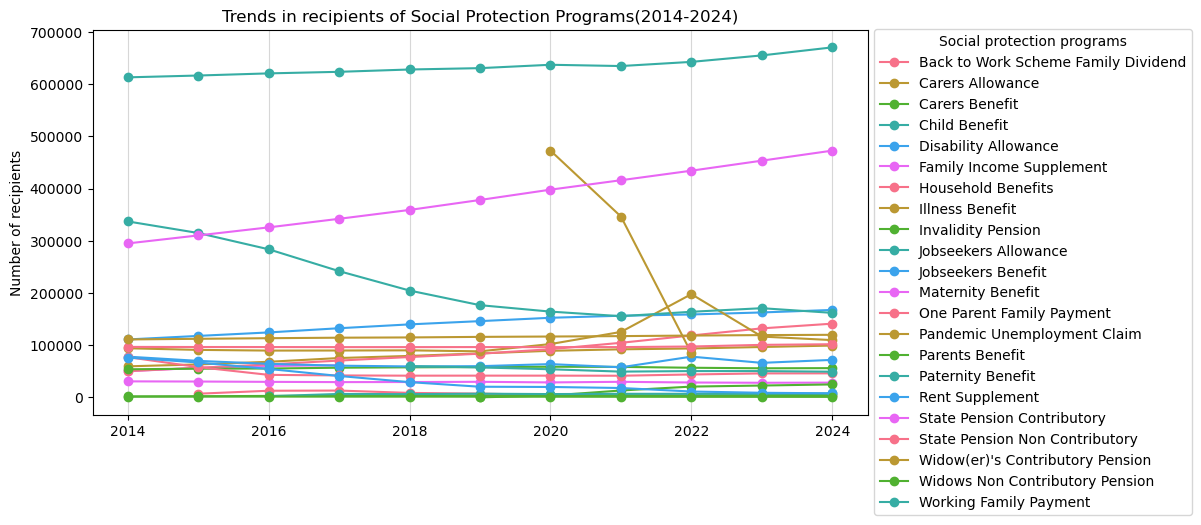

In [1292]:
# Initialize figure + custom size
plt.figure(figsize=(10, 5))

# Iterate through each social scheme program creating line plots
for column in pvt.columns:
    plt.plot(pvt.index, pvt[column], marker='o', label=column)

# Set label
plt.ylabel("Number of recipients")

# Set title
plt.title("Trends in recipients of Social Protection Programs(2014-2024)")

# Legend and gridconfiguration
plt.legend(title='Social protection programs', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.grid(axis='x', alpha=0.5)

# Display
plt.show()

**Analysis:** Pandemic, pension, child, and jobseeker benefits highlight comparing to other benefits.

In [1293]:
# Define time period
years = np.arange(2014, 2025)

# Initialize the plot + title and styling
fig = px.line(
            title='<b>Trends in recipients of Social Protection Programs</b><br><sup>The five highest recipients (2014-2024)</sup>',
            template='simple_white',
              )

# Add social protection program traces to plot
fig.add_trace(go.Scatter(x=years, y=social_programs['Child Benefit'], name="Child Benefit"))
fig.add_trace(go.Scatter(x=years, y=social_programs['Disability Allowance'], name="Disability Allowance	"))
fig.add_trace(go.Scatter(x=years, y=social_programs['Jobseekers Allowance'], name="Jobseekers Allowance"))
fig.add_trace(go.Scatter(x=years, y=social_programs['Pandemic Unemployment Claim'], name="Pandemic Unemployment Claim"))
fig.add_trace(go.Scatter(x=years, y=social_programs['State Pension Contributory'], name="State Pension Contributory"))

# Axis configuration
fig.update_xaxes(tickfont=dict(size=14), title_text='', showgrid=True)
fig.update_yaxes(tickfont=dict(size=14), title_text='')

# Line and marker style
fig.update_traces(mode='markers+lines', marker=dict(size=6))

# Layout adjustment
fig.update_layout(legend_title='Social Protection Programs', width=850, height=500)

![02_fig2](https://raw.githubusercontent.com/vinikcabral/Labour-Force-Social-Welfare-in-Ireland-PYTHON/refs/heads/main/assets/img/02_fig2.png)

**Analysis:** Pandemic Claim spikes in 2020-2021 and ends in 2022. Child Benefit and State Pension remain in consistent high, Jobseeker steady decline over decade.

#### 5 most counties with social protection scheme recipients exploration

In [1294]:
# 5 most recipients by county
top5_check = (
    mean_df.groupby(["Residence_county"])["Recipients"].sum()
    .reset_index()
    .sort_values(["Recipients"], ascending=False))

top5_check.head(5)

,Residence_county,Recipients
5,Dublin,"6,480,855"
3,Cork,"2,765,532"
6,Galway,"1,279,202"
8,Kildare,"1,098,602"
12,Limerick,"1,060,261"


In [1295]:
top5_by_year = (
    mean_df.groupby(["Residence_county", "Year"])["Recipients"].sum()
    .reset_index())

top5_by_year = top5_by_year[top5_by_year["Residence_county"].isin(["Dublin", "Cork", "Galway", "Kildare", "Limerick"])]

# Pivot table top5 counties
pvt_top_5 = top5_by_year.pivot(index="Year", columns="Residence_county", values="Recipients")
pvt_top_5

Residence_county,Cork,Dublin,Galway,Kildare,Limerick
Year,,,,,
2014,"237,784","549,365","108,686","93,562","91,531"
2015,"236,746","547,582","108,385","93,620","90,564"
2016,"235,000","545,516","107,825","92,745","89,953"
2017,"234,309","544,616","107,199","92,293","89,996"
2018,"233,090","541,200","106,778","91,967","89,708"
2019,"233,588","541,766","106,841","91,843","89,743"
2020,"287,678","702,792","135,976","115,605","109,159"
2021,"279,363","684,392","130,817","112,045","106,807"
2022,"269,114","632,238","126,355","106,889","103,385"


In [1296]:
# Define time period
years = np.arange(2014, 2025)

# Initialize the barplot + title and styling
fig_counties = px.bar(
            title='<b>Trends in Recipients of Social Protection Schemes By County</b><br><sup>The five highest recipients (2014-2024)</sup>',
            template='simple_white',
            )

# Add counties top 5 recipients to plot
fig_counties.add_trace(go.Bar(x=years, y=pvt_top_5['Cork'], name="Cork"))
fig_counties.add_trace(go.Bar(x=years, y=pvt_top_5['Dublin'], name="Dublin"))
fig_counties.add_trace(go.Bar(x=years, y=pvt_top_5['Galway'], name="Galway"))
fig_counties.add_trace(go.Bar(x=years, y=pvt_top_5['Kildare'], name="Kildare"))
fig_counties.add_trace(go.Bar(x=years, y=pvt_top_5['Limerick'], name="Limerick"))

# Axis configuration
fig_counties.update_xaxes(tickfont=dict(size=14), title_text='')
fig_counties.update_yaxes(tickfont=dict(size=14), title_text='', showgrid=True)

# Layout adjustment
fig_counties.update_layout(legend_title='Social Protection Schemes', width=850, height=500, barmode='group')

![05_fig1](https://raw.githubusercontent.com/vinikcabral/Labour-Force-Social-Welfare-in-Ireland-PYTHON/refs/heads/main/assets/img/05_fig1.png)

**Analysis:** Dublin shows highest recipient numbers, followed by cork. All counties follow similar trend patterns.

<Figure size 1000x500 with 0 Axes>

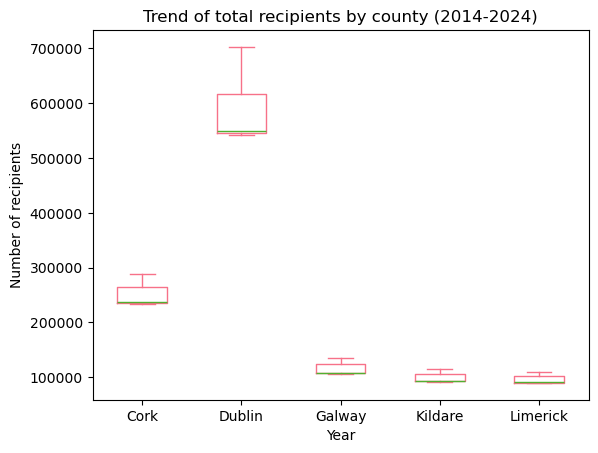

In [1297]:
# Initialize figure with custom size
plt.figure(figsize=(10, 5))

# Generate box plot from pivot table
pvt_top_5.plot(kind='box')

# Set labels
plt.xlabel('Year')
plt.ylabel("Number of recipients")

# Set title
plt.title("Trend of total recipients by county (2014-2024)")

# Display
plt.show()

**Analysis:** Dublin has significantly higher recipients totals than other counties, followed by Cork. Similar to last graphic results.

#### Linear Regression to evaluate disparities in uptaken schemes are statistically significant over the years, including/excluding "Pandemic Unemployment Claim". 

**Including Pandemic**

In [1298]:
# Average of recipient for scheme by year including pandemic
pd.options.display.float_format = '{:,.0f}'.format # Changing number format

pandemic_in = mean_scheme_year.groupby("Year")["Recipients"].sum().reset_index()
pandemic_in.tail()

,Year,Recipients
6,2020,"2,608,376"
7,2021,"2,528,953"
8,2022,"2,415,730"
9,2023,"2,300,839"
10,2024,"2,344,723"


In [1299]:
# Linear regression pandemic included
slope_pandemic_in, intercept_pandemic_in, r_value_pandemic_in, p_value_pandemic_in, std_error_pandemic_in = stats.linregress(pandemic_in['Year'], pandemic_in['Recipients'])

In [1300]:
# Display result
print("Slope: " + str(slope_pandemic_in))
print("Intercept: " + str(intercept_pandemic_in))
print("R value: " + str(r_value_pandemic_in))
print(f"R-squared (The coefficient of determination): {r_value_pandemic_in**2:.6f}")
print("P value: " + str(p_value_pandemic_in))
print("std_error " + str(std_error_pandemic_in))

Slope: 36501.15757575758
Intercept: -71436549.26666668
R value: 0.6328783888202555
R-squared (The coefficient of determination): 0.400535
P value: 0.036623035325861746
std_error 14884.937414817854


**Result:** Slope suggests recipients increased by ~36.500 people per year on average. R² suggests a weak model fit, with only 40% of variance explained. 

**Excluding Pandemic**

In [1301]:
# Average of recipient for scheme per year excluging pandemic
no_pandemic = mean_scheme_year[mean_scheme_year["Scheme_description"] != "Pandemic Unemployment Claim"]
no_pandemic = no_pandemic.groupby("Year")["Recipients"].sum().reset_index()
no_pandemic.tail()

,Year,Recipients
6,2020,"2,135,785"
7,2021,"2,182,586"
8,2022,"2,330,929"
9,2023,"2,300,839"
10,2024,"2,344,723"


In [1302]:
# Linear regression pandemic excluded
slope_no_pan, intercept_no_pan, r_value_no_pan, p_value_no_pan, std_error_no_pan = stats.linregress(no_pandemic['Year'], no_pandemic['Recipients'])

In [1303]:
# Display result
print("Slope: " + str(slope_no_pan))
print("Intercept: " + str(intercept_no_pan))
print("R value: " + str(r_value_no_pan))
print(f"R-squared (The coefficient of determination): {r_value_no_pan**2:.6f}")
print("P value: " + str(p_value_no_pan))
print("std_error " + str(std_error_no_pan))

Slope: 23594.55530303031
Intercept: -45460279.096212134
R value: 0.7870312799883328
R-squared (The coefficient of determination): 0.619418
P value: 0.004044593339203742
std_error 6164.850309492691


**Results:** Less growth than the last model with ~23.600 people per year. A better model fit with 62% of the variance explained by R². Highly statistically significant with p-value(0.004) < 0.05. 

**Conclusion:** Pandemic distorts long-term patterns, without it the model shows a strong upward trend.

### Objective 3
*I investigate the effectiveness of social protection schemes in the labour force, exploring the relationship between jobseeker (allowance and benefits), and unemployment.*

#### Correlation between jobseeker allowance, jobseeker benefit, and unemployment

In [1304]:
# Calculate average individuals by year and economic status
avg_year = (labour_df
            .groupby(["year", "economic_status"])
            .agg({"individuals": "mean"})
            .reset_index())

In [1305]:
# Filter jobseeker schemes
jobseeker_schemes = ["Jobseekers Allowance", "Jobseekers Benefit"]
proportion_scheme = mean_scheme_year[mean_scheme_year["Scheme_description"].isin(jobseeker_schemes)]

# Standardize column names
proportion_scheme.rename(columns={
    "Scheme_description": "scheme_description",
    "Year": "year", 
    "Recipients": "recipients"
}, inplace=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_43332\545619790.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1306]:
# Calculate proportion by labour force
# ==============================================

# Total individuals in labour force by year
proportion_labour = avg_year[avg_year["economic_status"] == "In labour force"]

# Merge scheme data with labour force data
proportion_scheme = proportion_scheme.merge(proportion_labour, on="year", how="left")

# Calculate proportion of recipients in labour force in a new column
proportion_scheme["proportion by labour"] = (proportion_scheme["recipients"] / proportion_scheme["individuals"])*100

In [1307]:
# Create pivot table for analysis
pvt_proportion = proportion_scheme.pivot(
    index="year", 
    columns="scheme_description", 
    values="proportion by labour"
)

In [1308]:
# Unemployed correlation
# ======================================

# Unemployed individuals by year
unemp_by_year = avg_year[avg_year["economic_status"] == "Unemployed"]

# Merge schemes proportion with unemployment by year
corr_analysis = proportion_scheme.merge(unemp_by_year, on="year", how="left")

# Calculate proportion of unemployment in labour force
corr_analysis["proportion by labour_unem"] = (corr_analysis["individuals_y"] / corr_analysis["individuals_x"])*100

In [1309]:
# Filter relevant columns for unemployment proportion analysis
select_columns = ['economic_status_y','year', 'individuals_y', 'proportion by labour_unem']
unemp_prop = corr_analysis[select_columns][:11]

In [1310]:
# Datasets display
print("UNEMPLOYMENT PROPORTION DATASET")
display(unemp_prop.head())
print("\nSCHEME PROPORTION BY LABOUR FORCE")
display(pvt_proportion.head())

UNEMPLOYMENT PROPORTION DATASET


,economic_status_y,year,individuals_y,proportion by labour_unem
0,Unemployed,2014,"267,125",12
1,Unemployed,2015,"225,150",10
2,Unemployed,2016,"194,675",8
3,Unemployed,2017,"158,525",7
4,Unemployed,2018,"138,825",6



SCHEME PROPORTION BY LABOUR FORCE


scheme_description,Jobseekers Allowance,Jobseekers Benefit
year,,
2014,15,3
2015,14,3
2016,12,3
2017,10,3
2018,9,2


In [1311]:
# Define time period
years = np.arange(2014, 2025)

# Initialize the plot + title and styling
fig_4 = px.line(
            title="<b>Jobseeker's Allowance, Benefit and Unemployment trend</b><br><sup>Proportion of the labour force (2014-2024)</sup>",
            template='simple_white',
                )

# Add proportion by schemes traces to plot
fig_4.add_trace(go.Scatter(x=years, y=pvt_proportion['Jobseekers Allowance'], name="Jobeseeker's Allowance", line=dict(color="#5E9FF2")))
fig_4.add_trace(go.Scatter(x=years, y=pvt_proportion['Jobseekers Benefit'], name="Jobseeker's Benefit", line=dict(color="#30838C")))
fig_4.add_trace(go.Scatter(x=years, y=unemp_prop['proportion by labour_unem'], name="Unemployment", line=dict(color="#F2522E")))

# Axis configuration
fig_4.update_xaxes(tickfont=dict(size=14), title_text='', showgrid=True)
fig_4.update_yaxes(tickfont=dict(size=14), title_text='(%)')

# Line and marker style
fig_4.update_traces(mode='markers+lines', marker=dict(size=6))

# Layout adjustment
fig_4.update_layout(width=850, height=500)

![03_fig1](https://raw.githubusercontent.com/vinikcabral/Labour-Force-Social-Welfare-in-Ireland-PYTHON/refs/heads/main/assets/img/03_fig1.png)

**Analysis:** All schemes had a dramatically spike in the last decade. Indicating improving Labour Force.

#### Linear regression calculation and graphics

In [1312]:
# Filter jobseeker scheme
allowance_plot = corr_analysis[corr_analysis["scheme_description"] == "Jobseekers Allowance"]
benefit_plot = corr_analysis[corr_analysis["scheme_description"] == "Jobseekers Benefit"]

In [1313]:
allowance_plot.head()

,scheme_description,year,recipients,economic_status_x,individuals_x,proportion by labour,economic_status_y,individuals_y,proportion by labour_unem
0,Jobseekers Allowance,2014,"337,017",In labour force,"2,255,650",15,Unemployed,"267,125",12
1,Jobseekers Allowance,2015,"314,844",In labour force,"2,280,800",14,Unemployed,"225,150",10
2,Jobseekers Allowance,2016,"283,644",In labour force,"2,326,900",12,Unemployed,"194,675",8
3,Jobseekers Allowance,2017,"241,796",In labour force,"2,357,825",10,Unemployed,"158,525",7
4,Jobseekers Allowance,2018,"204,648",In labour force,"2,403,825",9,Unemployed,"138,825",6


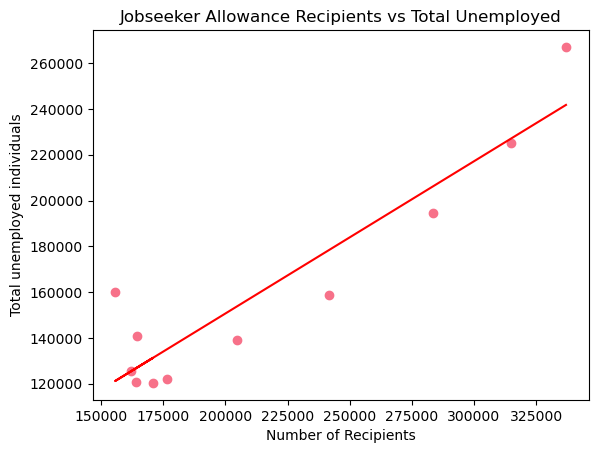

In [1314]:
# Linear Regression
# ====================================

# Calculate linear regression 
m, b = np.polyfit(allowance_plot['recipients'], allowance_plot['individuals_y'], 1)

# Plot data
plt.plot(allowance_plot['recipients'],  allowance_plot['individuals_y'], 'o')
plt.plot(allowance_plot['recipients'], m*allowance_plot['recipients']+b, color="red" )

# Set label
plt.xlabel("Number of Recipients")
plt.ylabel("Total unemployed individuals")

# Set title
plt.title("Jobseeker Allowance Recipients vs Total Unemployed")

# Display
plt.show()

**Analysis:** Strong positive correlation between Jobseeker allowance and Unemployment. Indicates that Jobseeker complements Unemployment individuals very well.

In [1315]:
# Perform linear regression analysis
slope_a, intercept_a, r_value_a, p_value_a, std_error_a = stats.linregress(allowance_plot['recipients'], allowance_plot['individuals_y'])

In [1316]:
# Display results
print("Slope: " + str(slope_a))
print("Intercept: " + str(intercept_a))
print("R value: " + str(r_value_a))
print(f"R-squared (The coefficient of determination): {r_value_a**2:.6f}")
print("P value: " + str(p_value_a))
print("std_error " + str(std_error_a))

Slope: 0.6652801142692174
Intercept: 17567.65253214416
R value: 0.9240073803512334
R-squared (The coefficient of determination): 0.853790
P value: 4.8189045716703876e-05
std_error 0.09176919502936996


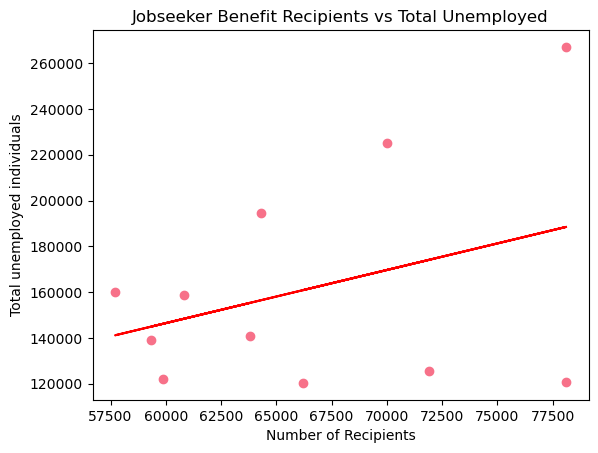

In [1317]:
# Linear Regression
# ====================================

# Calculate linear regression 
m, b = np.polyfit(benefit_plot['recipients'], benefit_plot['individuals_y'], 1)

# Plot data
plt.plot(benefit_plot['recipients'],  benefit_plot['individuals_y'], 'o', label='original data')
plt.plot(benefit_plot['recipients'], m*benefit_plot['recipients']+b, color="red" )

# Set label
plt.xlabel("Number of Recipients")
plt.ylabel("Total unemployed individuals")

# Set title
plt.title("Jobseeker Benefit Recipients vs Total Unemployed")

# Display
plt.show()

**Analysis:** Jobseeker Benefit had a weaker correlation comparing to Jobseeker Allowance. Less useful to understand Unemployment compared to Allowance. 

In [1318]:
# Perform linear regression analysis
slope_b, intercept_b, r_value_b, p_value_b, std_error_b = stats.linregress(benefit_plot['recipients'], benefit_plot['individuals_y'])

In [1319]:
# Display results
print("Slope: " + str(slope_b))
print("Intercept: " + str(intercept_b))
print("R value: " + str(r_value_b))
print(f"R-squared (The coefficient of determination): {r_value_b**2:.6f}")
print("P value: " + str(p_value_b))
print("std_error " + str(std_error_b))

Slope: 2.321762500960541
Intercept: 7113.690809820895
R value: 0.34780432294370495
R-squared (The coefficient of determination): 0.120968
P value: 0.2945939939942242
std_error 2.08623843707978


**Conclusion:** Jobseeker's Allowance effectively tracks unemployment trends, confirming its role as a good social protection tool during labour market fluctuations. Jobseeker's Benefit shows weaker correlation.

### Objective 4
*The main goal was to explore the relationship between social protection expenditures and unemployment setting a hypothesis test.*

#### Preparing data

In [1320]:
# Datasets for this analysis
# ======================================================

print("AVERAGE INDIVIDUALS BY YEAR AND ECONOMIC STATUS")
display(avg_year.head())
print("\nEXPENDITURE DATASET")
display(expenditure_df.head())

AVERAGE INDIVIDUALS BY YEAR AND ECONOMIC STATUS


,year,economic_status,individuals
0,1998,In employment,"1,593,575"
1,1998,In labour force,"1,725,250"
2,1998,Not in labour force,"1,154,400"
3,1998,Unemployed,"131,650"
4,1999,In employment,"1,698,375"



EXPENDITURE DATASET


,year,social protection expenditure,unit,value (euro)
0,2000,Total Social Protection,Million,16466
1,2000,Social Protection Benefits,Million,15584
2,2000,Sickness benefits,Million,5517
3,2000,Disability benefits,Million,682
4,2000,Old age benefits,Million,4444


In [1321]:
# Filter expenditure to unemployment benefits and total social protection expenditure
expenditure_unem = expenditure_df[expenditure_df["social protection expenditure"] == "Unemployment benefits"].reset_index(drop=True)
expenditure_total = expenditure_df[expenditure_df["social protection expenditure"] == "Total Social Protection"].reset_index(drop=True)

In [1322]:
# Filter for unemployed individuals between years 2000 and 2022 (inclusive)
lf_unemp = avg_year[(
    avg_year["economic_status"] == "Unemployed") & (
    avg_year["year"] > 1999) & (
    avg_year["year"] < 2023)
].reset_index(drop=True)

In [1323]:
lf_unemp.head()

,year,economic_status,individuals
0,2000,Unemployed,"81,200"
1,2001,Unemployed,"79,550"
2,2002,Unemployed,"91,475"
3,2003,Unemployed,"95,775"
4,2004,Unemployed,"96,575"


In [1324]:
# Merge unemployed individuals dataset with unemployed expenditure dataset
hpt_4 = lf_unemp.merge(expenditure_unem, on="year")

In [1325]:
hpt_4.head()

,year,economic_status,individuals,social protection expenditure,unit,value (euro)
0,2000,Unemployed,"81,200",Unemployment benefits,Million,1429
1,2001,Unemployed,"79,550",Unemployment benefits,Million,1520
2,2002,Unemployed,"91,475",Unemployment benefits,Million,1817
3,2003,Unemployed,"95,775",Unemployment benefits,Million,1958
4,2004,Unemployed,"96,575",Unemployment benefits,Million,2099


#### Checking Normality

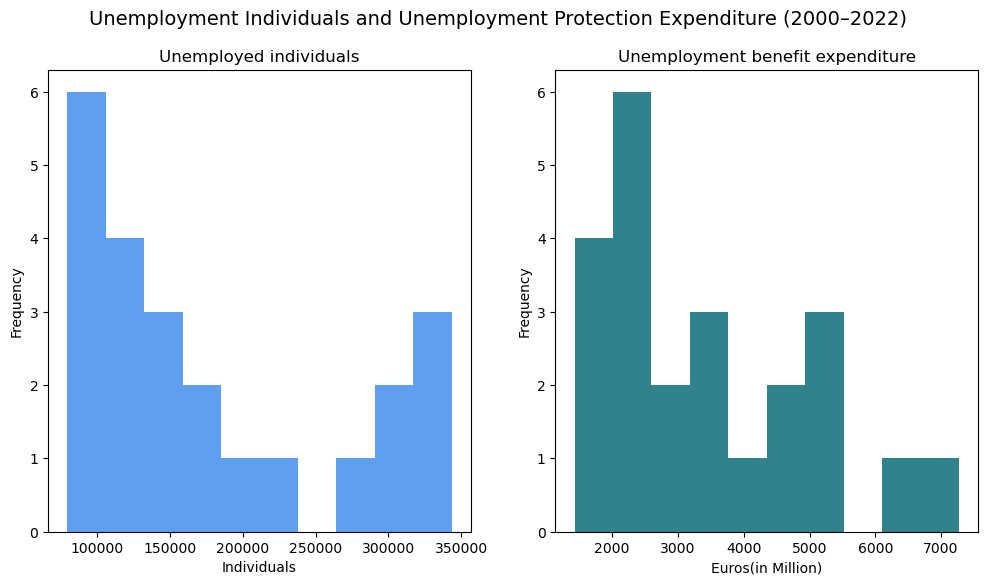

In [1326]:
# Subplots figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left plot for unemployed individuals
axes[0].hist(hpt_4["individuals"], bins=10, color="#5E9FF2")
axes[0].set_title("Unemployed individuals")
axes[0].set_xlabel('Individuals')
axes[0].set_ylabel('Frequency')

# Right plot for unmeployment benefit expenditure
axes[1].hist(hpt_4["value (euro)"], bins=10, color="#30838C")
axes[1].set_title("Unemployment benefit expenditure")
axes[1].set_xlabel('Euros(in Million)')
axes[1].set_ylabel('Frequency')

# Set title
fig.suptitle("Unemployment Individuals and Unemployment Protection Expenditure (2000–2022)", fontsize=14)

# Display
plt.show()

In [1327]:
# Perform Shapiro-Wilk normality test

def check_normality(data):
    
    test_stat_normality, p_value_normality = stats.shapiro(data)    
    print("p value:%.4f" % p_value_normality)
    
    if p_value_normality < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
        return False
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")
        return True
    
print("NORMALITY TEST: UNEMPLOYED INDIVIDUALS")
check_normality(hpt_4["individuals"])
print('\n')
print("NORMALITY TEST: UNEMPLOYMENT EXPENDITURE")
check_normality(hpt_4["value (euro)"])

NORMALITY TEST: UNEMPLOYED INDIVIDUALS
p value:0.0027
Reject null hypothesis >> The data is not normally distributed


NORMALITY TEST: UNEMPLOYMENT EXPENDITURE
p value:0.0734
Fail to reject null hypothesis >> The data is normally distributed


True

#### Kendal test

**Null Hypothesis : Social protection expenditure has no effect on unemployment.**

**Alternative Hypothesis: Social protection expenditure has a significant effect on unemployment.**

In [1328]:
# Calculate Kendall's tau correlation coefficient and p-value
kendal_corr = stats.kendalltau(hpt_4["individuals"], hpt_4["value (euro)"])
print('KENDALL TAU CORRELATION RESULTS')
print(f"Correlation Coefficient: {kendal_corr.correlation:.4f}")
print(f"P-value: {kendal_corr.pvalue:.4f}")

KENDALL TAU CORRELATION RESULTS
Correlation Coefficient: 0.7470
P-value: 0.0000


**Analysis:** Strong correlation = 0.747. Highly significant. As unemployment increases, expenditure increases too.

**Conclusion:** we reject the null hypothesis so there is a strong correlation between unemployment and expenditure.


#### Linear Regression

In [1329]:
# Convert expenditure from millions to actual euros
hpt_4['value (euro)'] = hpt_4['value (euro)']*1000000

# Perform linear regression analysis
slope, intercept, r_value, p_value, std_error = stats.linregress(hpt_4["individuals"], hpt_4["value (euro)"])

In [1330]:
# Display results
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("R value: " + str(r_value))
print(f"R-squared (The coefficient of determination): {r_value**2:.6f}")
print("P value: " + str(p_value))
print("std_error " + str(std_error))

Slope: 11579.875220833403
Intercept: 1371561364.2194443
R value: 0.6629766399983944
R-squared (The coefficient of determination): 0.439538
P value: 0.0005653338832772529
std_error 2853.4422168583133


**Results:** Stron relationship, each unemployment person increase 11.580 euros in expenditure. Model explains just 44%, moderate model fit.

In [1331]:
# Define time period
years = np.arange(2014, 2025)

# Initialize the plot + title and styling
fig_7 = px.line(
            title="<b>Unemployment expenditure VS Unemployed individuals</b><br><sup>Linear regression showing their correlation </sup>",
            template='simple_white',
              )

# Add trace
fig_7.add_trace(go.Scatter(x=hpt_4.individuals, y=hpt_4['value (euro)'], line=dict(color="#30838C")))


# Axis configuration
fig_7.update_xaxes(tickfont=dict(size=14), title_text='', showgrid=True)
fig_7.update_yaxes(tickfont=dict(size=14), title_text='')

# Line and market style
fig_7.update_traces(mode='markers', marker=dict(size=8, symbol='x'))

# Layout adjustment
fig_7.update_layout(width=800, height=600)

# Add regression line
fig_7.add_trace(go.Scatter(x=hpt_4.individuals, 
                           y=[intercept_c + slope_c * x for x in hpt_4.individuals],
                           mode='lines', 
                           line=dict(color="#F2522E", width=3)))

![04_fig2](https://raw.githubusercontent.com/vinikcabral/Labour-Force-Social-Welfare-in-Ireland-PYTHON/refs/heads/main/assets/img/04_fig2.png)

**Analysisi:** The graphic indicates a strong positive correlation between unemployment expenditure and unemployment individuals. Validate system responsiveness.